## Mammografic cancer - Supervised learning - Binary Classification

---

This Notebook is to practice some ML algorithms on mammografic cancer dataset (833,5) extracted from X ray images.
- Note this is Supervised learning => binary classification problem
- features of the dataset are age, shape, margin and density and the dependent variable is severity (0 = benign / 1 = malign)

Will practice usage of:
- Binary Logistic regression => accuracy = 0.825
- Decission tree => accuracy = 0.822

We will be calculating the following metrics where applicable:
- f1_score
- accuracy score
- confusion matrix
- ROC AUC

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
df = pd.read_excel('data.xlsx')
df.shape

(833, 5)

In [3]:
df.head(5)

,severity,age,shape,margin,density
0,1.0,67.0,3.0,5.0,3.0
1,1.0,58.0,4.0,5.0,3.0
2,0.0,28.0,1.0,1.0,3.0
3,1.0,57.0,1.0,5.0,3.0
4,1.0,76.0,1.0,4.0,3.0


In [4]:
df.replace([np.inf, -np.inf], np.nan)
print(df.isna().sum())

severity    2
age         0
shape       2
margin      2
density     2
dtype: int64


In [5]:
df.dropna(axis=0,inplace=True)
print('*****************************************')
print(df.isna().sum())

*****************************************
severity    0
age         0
shape       0
margin      0
density     0
dtype: int64


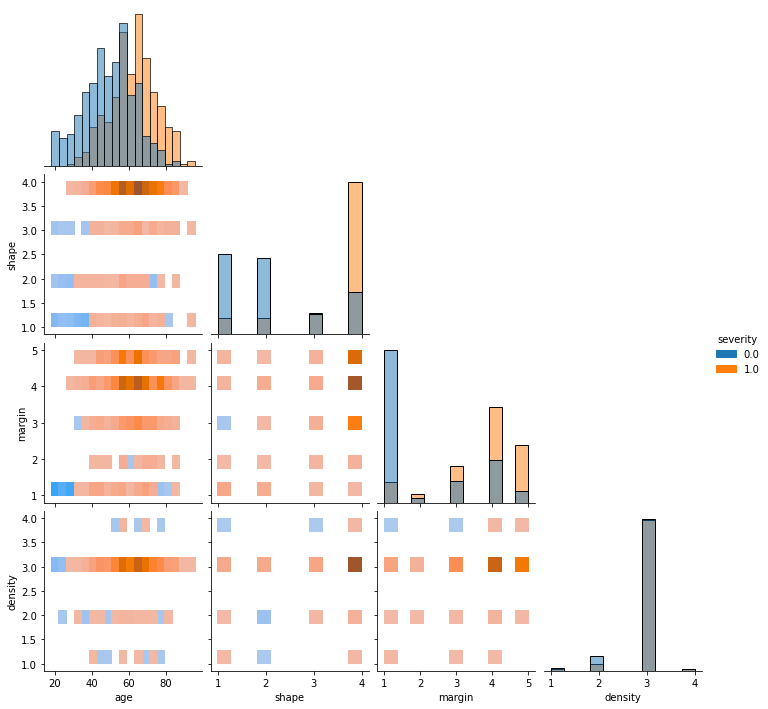

In [6]:
sns.pairplot(df,hue = 'severity', corner = True, markers = ['o','D'], kind = 'hist');

In [7]:
print(df.groupby(['severity']).agg(['max','min','mean','median']))
print(); print('****************************************************************************')

           age                         shape                       margin  \
           max   min       mean median   max  min      mean median    max   
severity                                                                    
0.0       86.0  18.0  49.303738   50.0   4.0  1.0  2.105140    2.0    5.0   
1.0       96.0  28.0  62.652605   64.0   4.0  1.0  3.503722    4.0    5.0   

                               density                        
          min      mean median     max  min      mean median  
severity                                                      
0.0       1.0  1.943925    1.0     4.0  1.0  2.892523    3.0  
1.0       1.0  3.739454    4.0     4.0  1.0  2.940447    3.0  

****************************************************************************


In [8]:
X = df.loc[:, ['age', 'shape', 'margin', 'density']].values;
y = df.loc[:, ['severity']].values.astype(int);

### Binary logistic regression

C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy =  0.8181818181818182
ROC AUC:  0.8810204297660633


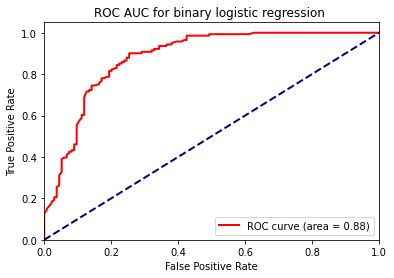

In [9]:
# Normalizing X
X = StandardScaler().fit(X).transform(X)

# Setting training and test data from the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, shuffle=True);
X_train = np.around(X_train, decimals = 5)
X_test = np.around(X_test, decimals = 5)

# We train the binary logistic regression model and fit
clf = LogisticRegression(solver='lbfgs',max_iter=3000).fit(X_train, y_train)
    
# Predicted values from X_test
y_hat = clf.predict(X_test)

# Metrics
acc = accuracy_score(y_test, y_hat)
prec = average_precision_score(y_test, y_hat, average='macro')
rec = recall_score(y_test, y_hat, average='macro')
f1scor = f1_score(y_test,y_hat,average='binary')
print('Accuracy = ', acc)
    
# We will now calculate the ROC AUC and plot it
# Learn to predict each class against the other
y_score = clf.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve, ROC area and plot it
fpr, tpr, threshold = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC: ', roc_auc)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC for binary logistic regression ')
plt.legend(loc="lower right")
plt.show()

### Decision tree

We are also going to use a decision tree:

In [10]:
# We generate and train the decision tree
DT = tree.DecisionTreeClassifier(criterion="entropy",max_depth=4)
DT = DT.fit(X_train,y_train)
    
# Predicted values from X_test
y_hat = DT.predict(X_test)
    
print("DecisionTrees's f1_score: ", f1_score(y_test,y_hat, average = 'macro'))
print("DecisionTrees's Accuracy: ", accuracy_score(y_test, y_hat))

cm = confusion_matrix(y_test, y_hat)
print(cm)
    
cmfor0 = cm[0,0]/np.sum(cm[0,]); print(cmfor0)
cmfor1 = cm[1,1]/np.sum(cm[1,]); print(cmfor1)

DecisionTrees's f1_score:  0.7880792942176871
DecisionTrees's Accuracy:  0.7890909090909091
[[ 99  35]
 [ 23 118]]
0.7388059701492538
0.8368794326241135


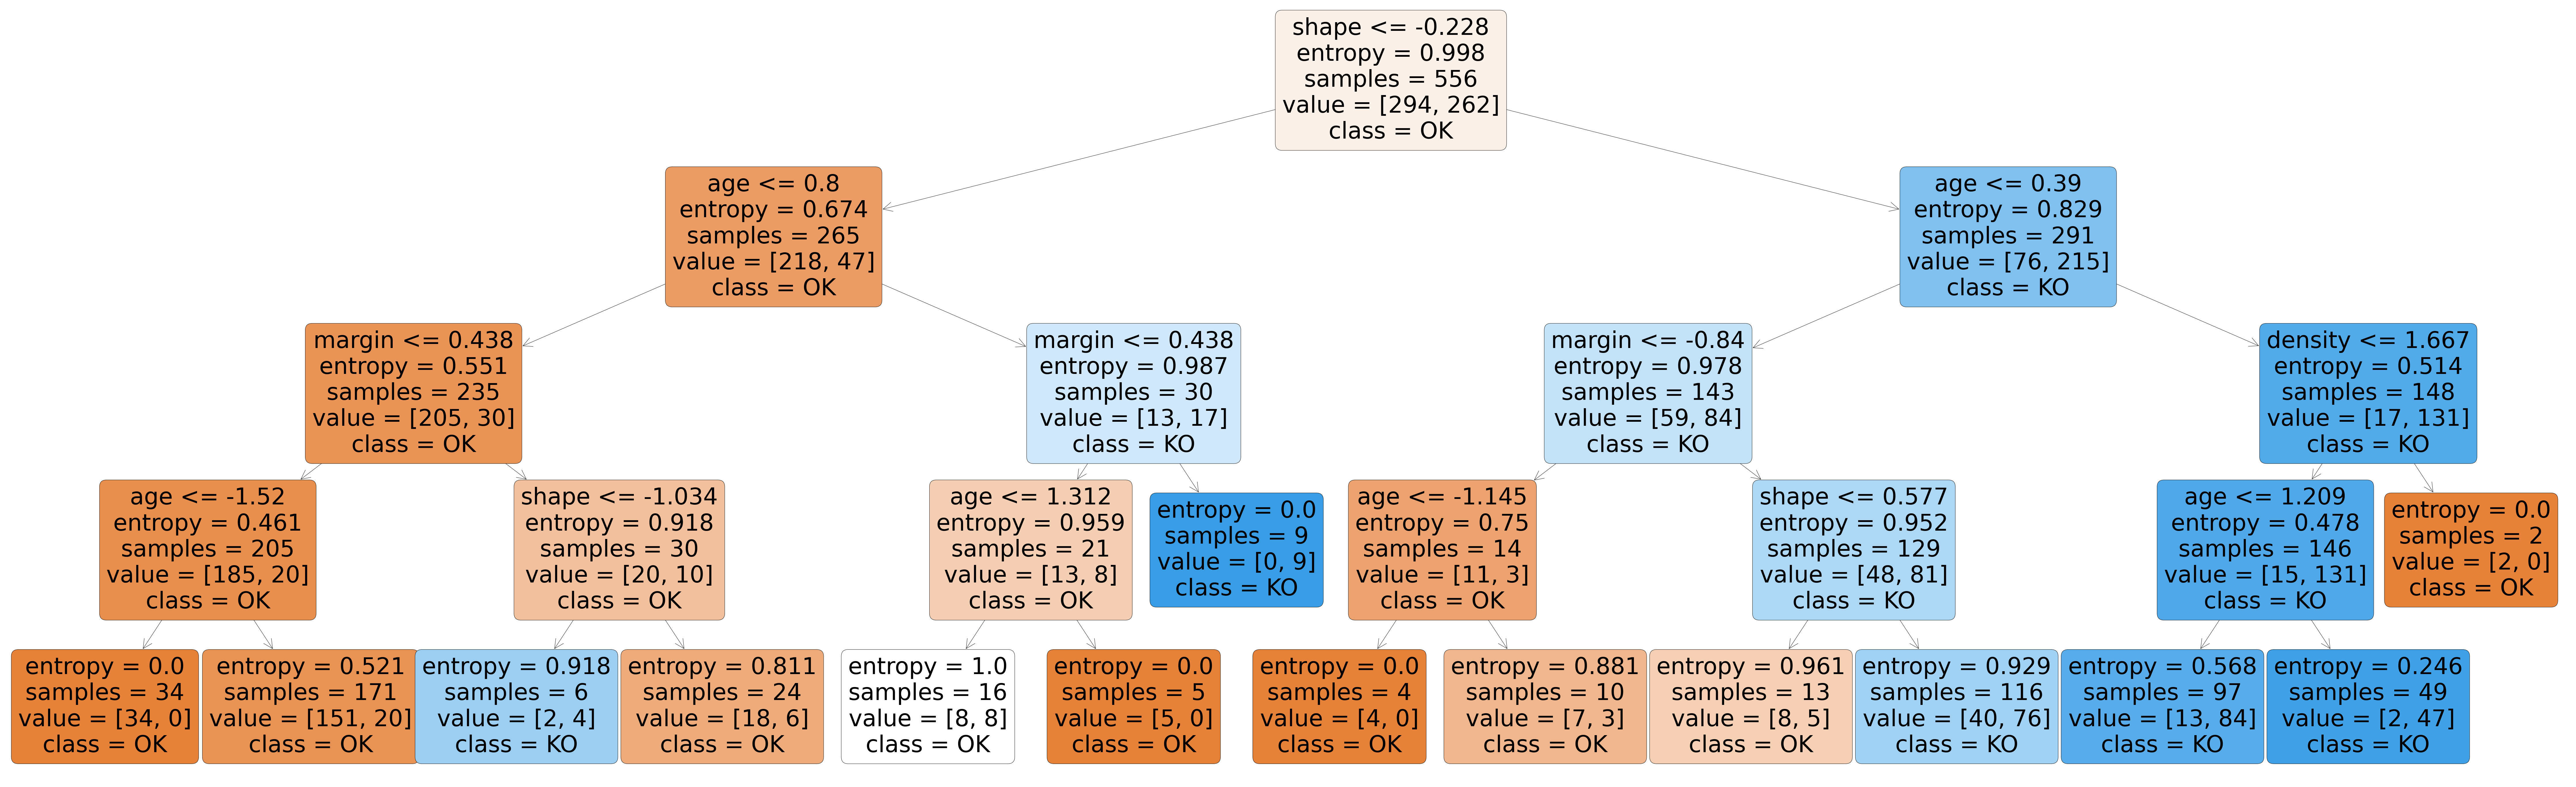

In [11]:
# We plot the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(160,50))
a = plot_tree(DT,
              class_names=["OK","KO"],
              feature_names=['age', 'shape', 'margin', 'density'],
              filled=True, 
              rounded=True, 
              fontsize=80)